### Random Forest using Grid Search

In [1]:
from model_utils import ModelUtils
import pandas as pd
import warnings

In [2]:
def warn(*args, **kwargs):
    pass
warnings.warn = warn

#### Read Dataset

In [3]:
df = pd.read_csv("../audit_data/final_audit.csv")

In [4]:
df.head()

,Sector_score,Score_A,Risk_A,Score_B.1,District_Loss,Prob,Score,Inherent_Risk,CONTROL_RISK,Risk
0,3.89,0.6,2.508,0.2,2,0.2,2.4,8.574,0.4,1
1,3.89,0.2,0.000,0.2,2,0.2,2.0,2.554,0.4,0
2,3.89,0.2,0.102,0.2,2,0.2,2.0,1.548,0.4,0
3,3.89,0.2,0.000,0.6,2,0.2,4.4,17.530,0.4,1
4,3.89,0.2,0.000,0.2,2,0.2,2.0,1.416,0.4,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   748 non-null    float64
 1   Score_A        748 non-null    float64
 2   Risk_A         748 non-null    float64
 3   Score_B.1      748 non-null    float64
 4   District_Loss  748 non-null    int64  
 5   Prob           748 non-null    float64
 6   Score          748 non-null    float64
 7   Inherent_Risk  748 non-null    float64
 8   CONTROL_RISK   748 non-null    float64
 9   Risk           748 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 58.6 KB


### Sampling

In [6]:
from collections import Counter

In [7]:
X, y = ModelUtils.split_into_features_and_label(df, "Risk")

In [8]:
X, y = ModelUtils.randomOverSample(df, X, y)
print(Counter(y))

Counter({1: 471, 0: 471})


### Train | Test | Split

In [9]:
X, y, X_train, y_train, X_eval, y_eval, X_test, y_test  = ModelUtils.divide_into_train_test_datasets(X, y)

### Random Forest - Grid Search

In [10]:
model = ModelUtils.randomForestGridSearch(X_train, y_train, [10, 15, 18, 20, 22, 25, 30], [2, 3, 4, 5, 7, 9])

In [11]:
model.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_features': 3,
 'n_estimators': 15,
 'oob_score': False}

In [12]:
y_pred = model.predict(X_eval)

### Model Evaluation

Evaluation Model Report




              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        49

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94



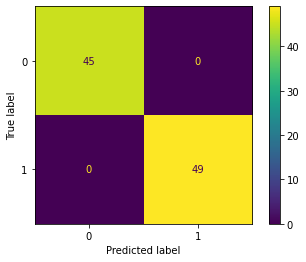

In [13]:
ModelUtils.printCompleteReport(model, X_eval, y_eval, y_pred, "Evaluation")

### Final Prediction

In [14]:
final_pred = model.predict(X_test)

Final Model Report




              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.98      1.00      0.99        44

    accuracy                           0.99        95
   macro avg       0.99      0.99      0.99        95
weighted avg       0.99      0.99      0.99        95



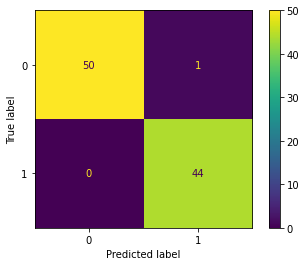

In [15]:
ModelUtils.printCompleteReport(model, X_test, y_test, final_pred, "Final")

Computing grid search does not make any sense in this case, because it doesn't improve model at all and uses more memory to achive score.